# [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

# What is brain Tumor ?
A brain tumor is a mass or growth of abnormal cells in your brain.
Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). 
Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain as secondary (metastatic) brain tumors.

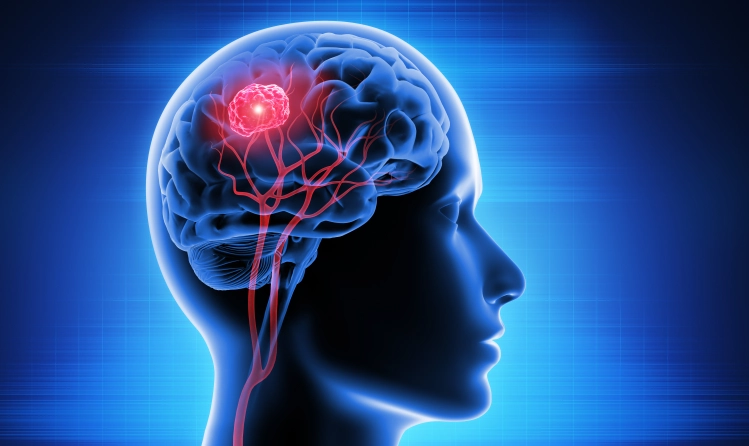

# THree types of tumor:
1. Glioma Tumor
2. Meningioma Tumor
3. Pituitary Tumor

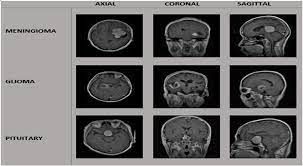

* In this notebook, I've used CNN to perform Image Classification on the Brain Tumor dataset.
* Since this dataset is small, if we train a neural network to it, it won't really give us a good result.
* Therefore, I'm going to use the concept of Transfer Learning to train the model to get really accurate results.

If you think this notebook is helful then upvote me!
Thanks!

# Importing Required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

# Data Preperation

In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
      
    
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        


100%|██████████| 74/74 [00:00<00:00, 99.83it/s] 


In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
y_train

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [8]:
X_train.shape

(3264, 150, 150, 3)

# Split dataset int train and test sets

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

# As multiclass classification, so i had perform OneHotEncoding

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Transfer Learning:

Transfer learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task. To put it simply—a model trained on one task is repurposed on a second, related task as an optimization that allows rapid progress when modeling the second task

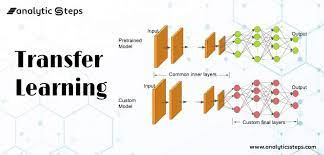

In this notebook, I'll be using the **VGG16** and  **EfficientNetB0** model which will use the weights from the ImageNet dataset.

The include_top parameter is set to False so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

# VGG16

 VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.

Arcitecture

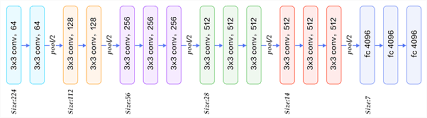

In [11]:
base_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

2022-11-03 17:40:06.429853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 17:40:06.576017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 17:40:06.576875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 17:40:06.578766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
base_model.trainable=False

# Adding top_layers

In [13]:
model1 = base_model.output

model1 = tf.keras.layers.Dense(512,activation='relu')(model1)
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=base_model.input, outputs = model1)

In [14]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Callback preperation

A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk.

In [15]:
tensorboard1 = TensorBoard(log_dir = 'logs')
checkpoint1 = ModelCheckpoint("vgg16",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr1 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

2022-11-03 17:40:10.391985: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 17:40:10.392027: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-03 17:40:10.394232: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-11-03 17:40:10.619075: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 17:40:10.619304: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


# Compile our model VGG16 included model

In [16]:
model1.compile(optimizer="Adam",loss='categorical_crossentropy', metrics=['accuracy'])

Training Process of Model

In [17]:
history1 = model1.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                      callbacks=[tensorboard1,checkpoint1,reduce_lr1])

2022-11-03 17:40:11.607682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12


2022-11-03 17:40:13.139808: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/83 [..............................] - ETA: 11:22 - loss: 9.6126 - accuracy: 0.1562

2022-11-03 17:40:20.006302: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 17:40:20.006348: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/83 [..............................] - ETA: 26s - loss: 9.2937 - accuracy: 0.1719  

2022-11-03 17:40:20.318323: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-03 17:40:20.319096: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-03 17:40:20.451280: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 164 callback api events and 161 activity events. 
2022-11-03 17:40:20.457883: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 17:40:20.471526: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_11_03_17_40_20

2022-11-03 17:40:20.475304: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_11_03_17_40_20/e47a839b602d.trace.json.gz
2022-11-03 17:40:20.492618: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

83/83 [==============================] - 14s 69ms/step - loss: 2.6743 - accuracy: 0.6239 - val_loss: 0.7813 - val_accuracy: 0.7755

Epoch 00001: val_accuracy improved from -inf to 0.77551, saving model to vgg16


2022-11-03 17:40:26.437312: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/12
83/83 [==============================] - 3s 41ms/step - loss: 0.7277 - accuracy: 0.7927 - val_loss: 0.4529 - val_accuracy: 0.8741

Epoch 00002: val_accuracy improved from 0.77551 to 0.87415, saving model to vgg16
Epoch 3/12
83/83 [==============================] - 3s 41ms/step - loss: 0.4790 - accuracy: 0.8396 - val_loss: 0.3304 - val_accuracy: 0.8776

Epoch 00003: val_accuracy improved from 0.87415 to 0.87755, saving model to vgg16
Epoch 4/12
83/83 [==============================] - 3s 37ms/step - loss: 0.3246 - accuracy: 0.8838 - val_loss: 0.3089 - val_accuracy: 0.8878

Epoch 00004: val_accuracy improved from 0.87755 to 0.88776, saving model to vgg16
Epoch 5/12
83/83 [==============================] - 3s 38ms/step - loss: 0.2588 - accuracy: 0.9031 - val_loss: 0.2327 - val_accuracy: 0.9354

Epoch 00005: val_accuracy improved from 0.88776 to 0.93537, saving model to vgg16
Epoch 6/12
83/83 [==============================] - 3s 38ms/step - loss: 0.2061 - accuracy: 0.9240 - val

In [18]:
model1.save("brain_model.h5")

In [19]:
pred = model1.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [20]:
prediction = pd.DataFrame(pred, columns=['predictions']).to_csv('prediction.csv')

In [21]:
prediction

# Using another pretrained model EfficientNetB0!

# EfficientNetB0

EfficientNet-b0 is a convolutional neural network that is trained on more than a million images from the ImageNet database [1]. The network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224

# Arcitecture

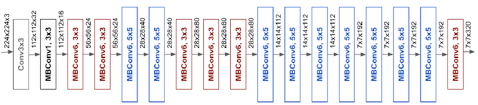

In [22]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16719872/16705208 [==============================] - 0s 0us/step


In [23]:
model2 = effnet.output
model2 = tf.keras.layers.GlobalAveragePooling2D()(model2)
model2 = tf.keras.layers.Dropout(rate=0.5)(model2)
model2 = tf.keras.layers.Dense(4,activation='softmax')(model2)
model2 = tf.keras.models.Model(inputs=effnet.input, outputs = model2)

In [24]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
____________________________________________________________________________________________

In [25]:
tensorboard2 = TensorBoard(log_dir = 'logs')
checkpoint2 = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr2 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

2022-11-03 17:41:19.521542: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 17:41:19.521586: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-03 17:41:19.685425: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 17:41:19.685636: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [26]:
model2.compile(optimizer="Adam",loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model2.fit(X_train,y_train,validation_split=0.1, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard2,checkpoint2,reduce_lr2])

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
 1/83 [..............................] - ETA: 11:33 - loss: 1.6402 - accuracy: 0.1562

2022-11-03 17:41:29.302508: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 17:41:29.302564: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/83 [..............................] - ETA: 1:03 - loss: 1.4526 - accuracy: 0.3438 

2022-11-03 17:41:30.187318: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-03 17:41:30.190616: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-03 17:41:30.347213: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2098 callback api events and 2095 activity events. 
2022-11-03 17:41:30.401135: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 17:41:30.463134: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_11_03_17_41_30

2022-11-03 17:41:30.502807: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.trace.json.gz
2022-11-03 17:41:30.595261: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

 3/83 [>.............................] - ETA: 1:13 - loss: 1.4290 - accuracy: 0.3333

2022-11-03 17:41:30.606002: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.memory_profile.json.gz
2022-11-03 17:41:30.610510: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/train/plugins/profile/2022_11_03_17_41_30
Dumped tool data for xplane.pb to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.xplane.pb
Dumped tool data for overview_page.pb to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to logs/train/plugins/profile/2022_11_03_17_41_30/e47a839b602d.kernel_stats.pb



83/83 [==============================] - 22s 162ms/step - loss: 0.4552 - accuracy: 0.8377 - val_loss: 0.4890 - val_accuracy: 0.8469

Epoch 00001: val_accuracy improved from -inf to 0.84694, saving model to effnet.h5
Epoch 2/20
83/83 [==============================] - 10s 118ms/step - loss: 0.1673 - accuracy: 0.9470 - val_loss: 0.4608 - val_accuracy: 0.8673

Epoch 00002: val_accuracy improved from 0.84694 to 0.86735, saving model to effnet.h5
Epoch 3/20
83/83 [==============================] - 10s 118ms/step - loss: 0.1429 - accuracy: 0.9512 - val_loss: 0.4946 - val_accuracy: 0.8707

Epoch 00003: val_accuracy improved from 0.86735 to 0.87075, saving model to effnet.h5
Epoch 4/20
83/83 [==============================] - 10s 117ms/step - loss: 0.1068 - accuracy: 0.9667 - val_loss: 0.2457 - val_accuracy: 0.9286

Epoch 00004: val_accuracy improved from 0.87075 to 0.92857, saving model to effnet.h5
Epoch 5/20
83/83 [==============================] - 10s 119ms/step - loss: 0.0563 - accuracy: 

In [28]:
model2.save("brain_model.h5")

# Prediction for vgg16 included model

In [29]:
pred1 = model1.predict(X_test)
pred1 = np.argmax(pred,axis=0)
y_test_new1 = np.argmax(y_test,axis=1)

# Prediction for EfficientNetB0 included model

In [30]:
pred2 = model2.predict(X_test)
pred2 = np.argmax(pred,axis=0)
y_test_new2 = np.argmax(y_test,axis=1)